### 11.9

In [1]:
import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

    
time_till_all_burned = []

burned_area_means = [] # a list of 10 means for each probability

probabilities = [0,.1,0.2,0.3,0.4,.5]   
# probabilities = [0,.1,0.2,0.3,0.4,.5,0.6,0.7,0.8,0.9,1]    
    

def step():
    global time, config, nextConfig

    
    
    for x in range(width):
        for y in range(height): 
            
            '''Run until the fire stops spreading'''
            while config[(y)%height, (x)%width] != nextConfig[(y)%height, (x)%width]: 
                
                time += 1

                for x in range(width):
                    for y in range(height):
                        state = config[y, x]
                        if state == fire:
                            state = char
                        elif state == tree:
                            for dx in range(-1, 2):
                                for dy in range(-1, 2):
                                    if config[(y+dy)%height, (x+dx)%width] == fire:
                                        state = fire
                        nextConfig[y, x] = state

                config, nextConfig = nextConfig, config

'''Will not be using the simulator, because we are not interested in visualizing each single simulation'''
# import pycxsimulator
# pycxsimulator.GUI().start(func=[init,draw,step])

'Will not be using the simulator, because we are not interested in visualizing each single simulation'

In [2]:
import numpy as np

probabilities = [0,.1,0.2,0.3,0.4,.5,0.6,0.7,0.8,0.9,1]
burned_area_means = [] # a list of 10 means for each probability
all_time = []

for p in probabilities:

    initProb = p
    
    burned_area_for_all_probs = [] # a list of percentages of burned areas for each probability
    
    times = []
    
    for i in range(1,5):
        
        init()
        step()
        
        burned_area = 0
        
        for x in range(width):
            for y in range(height):
                if config[(y)%height, (x)%width] == char:
                    burned_area += 1
        
#         print(burned_area)
        
        burned_area_total = float(burned_area/(width*height)) # for each run 'i' for each prob
        burned_area_for_all_probs.append(burned_area_total)
        times.append(time)

    burned_area_means.append(np.mean(burned_area_for_all_probs))
    all_time.append(np.mean(times))

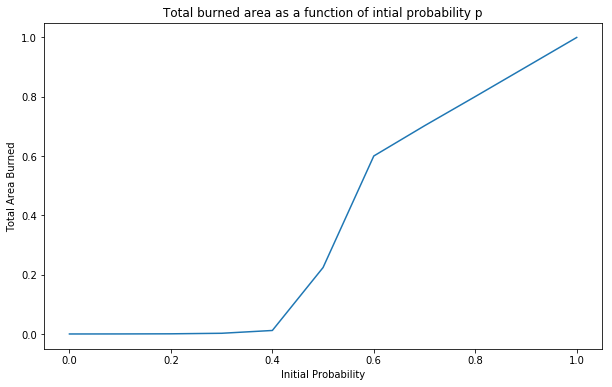

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(probabilities, burned_area_means)
plt.xlabel('Initial Probability')
plt.ylabel('Total Area Burned')
plt.title('Total burned area as a function of intial probability p')
plt.show()

In [4]:
all_time

[1.0, 2.25, 3.75, 7.25, 11.75, 34.0, 62.5, 57.75, 56.25, 53.75, 52.0]

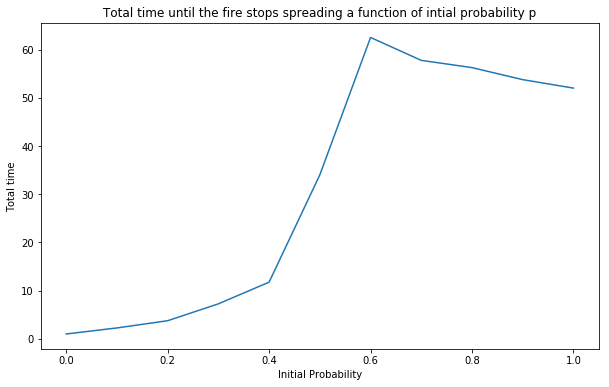

In [5]:
plt.figure(figsize=(10,6))
plt.plot(probabilities, all_time)
plt.xlabel('Initial Probability')
plt.ylabel('Total time')
plt.title('Total time until the fire stops spreading a function of intial probability p')
plt.show()

### Task II. (12.8)

Trees in figure 12.6 look like they are organized in the blocks of four and not scattered arround, which is not how we would see it in nature. Therefore, this specific assumption does not account for a variety of configurations that could apprear in real life and this spacial distribution is not exactly realistic.
